In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
A = np.ones((6, 6))
A[:,:2] = A[:,:2]*2
A[:,2:4] = A[:,2:4]*3
A[:,4:] = A[:,4:]*4

print(A)

[[2. 2. 3. 3. 4. 4.]
 [2. 2. 3. 3. 4. 4.]
 [2. 2. 3. 3. 4. 4.]
 [2. 2. 3. 3. 4. 4.]
 [2. 2. 3. 3. 4. 4.]
 [2. 2. 3. 3. 4. 4.]]


In [3]:
our_map = 'hot'
#our_map = 'gray'

In [4]:
U, S, VT = np.linalg.svd(A)
S = np.diag(S)

In [5]:
def draw_svd(A,U, S, VT, our_map):
  plt.subplot(221 )
  plt.title('Original matrix')
  plt.imshow(A, cmap =our_map)
  plt.axis('off')
  plt.subplot(222)
  plt.title('U  matrix')
  plt.imshow(U, cmap =our_map)
  plt.axis('off')
  plt.subplot(223)
  plt.title('Sigma matrix')
  plt.imshow(S, cmap =our_map)
  plt.axis('off')
  plt.subplot(224)
  plt.title('V matrix')
  plt.imshow(VT, cmap =our_map)
  plt.axis('off')

In [6]:
def truncate_u_v(S, U, VT):
  threshold = 0.001
  s = np.diag(S)
  index = s < threshold

  U[:,index] = 0
  VT[index,:]=0
  return U, VT

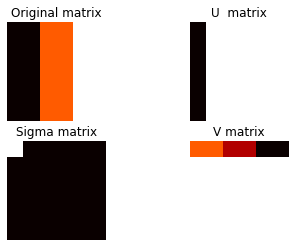

In [7]:
U, VT = truncate_u_v(S, U, VT)
draw_svd(A, U, S, VT, our_map) 

(-0.5, 5.5, 5.5, -0.5)

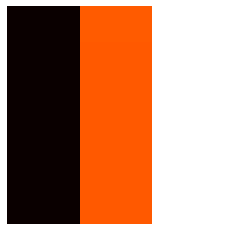

In [8]:
r = 1
A0_r = np.matmul(U[:,:r] , S[:r,:r]) 
A0_r = np.matmul (A0_r , VT[:r,:])
plt.imshow(A0_r, cmap =  our_map)
plt.axis('off')

In [9]:
A = [[1, 0], [1, 1]]
U, S, VT = np.linalg.svd(A)
S = np.diag(S)

print(f"U {U}\nS {S}\nVT {VT}")

U [[-0.52573111 -0.85065081]
 [-0.85065081  0.52573111]]
S [[1.61803399 0.        ]
 [0.         0.61803399]]
VT [[-0.85065081 -0.52573111]
 [-0.52573111  0.85065081]]


In [10]:
from sklearn.datasets import fetch_olivetti_faces
face = fetch_olivetti_faces()

X = face.data
# The images are of size 64 x 64
X.shape

(400, 4096)

In [11]:
faces = X[0,:].reshape((64,64))

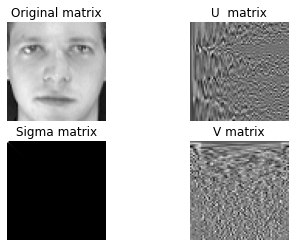

In [12]:
# we decompose the image of a face
U, S, VT = np.linalg.svd(faces)
S = np.diag(S)
faces = faces.astype('float')
#U, VT = truncate_u_v(S, U, VT)
draw_svd(faces, U, S, VT, 'gray')

<StemContainer object of 3 artists>

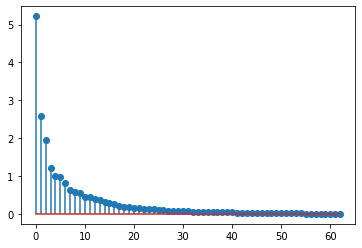

In [13]:
diag_elem = np.diag(S)
plt.stem(diag_elem[1:])

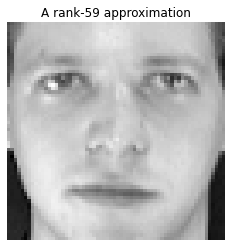

In [15]:
for r in range(1, 60):
    img_r = np.matmul(U[:,:r] , S[:r,:r]) 
    img_r = np.matmul (img_r , VT[:r,:])

    plt.title(f"A rank-{r} approximation")
    plt.imshow(img_r, cmap = 'gray')
    filename = "image_" + str(r).zfill(3) + ".jpg"
    plt.axis('off')
    plt.savefig(filename)
